In [360]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [361]:
pip install pandas


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [362]:
pip install pandas_profiling


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [363]:
pip install seaborn

You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [364]:
pip install jupyter_scheduler

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [365]:
pip install jupyterlab-scheduler

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [366]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [367]:
pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [368]:
pip install snowflake-connector-python[pandas]

You should consider upgrading via the 'c:\users\ridaa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [422]:
import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt 
import getpass
import seaborn as sns 
%matplotlib inline
import snowflake.connector

In [423]:
conn = snowflake.connector.connect(
        user = 'ASHFAQ13',
        #assword = getpass.getpass('Your Snowflake Password: '),
        password='Lakshaya@1998',
        account = 'vr33157.ap-south-1.aws',
        database='RETAIL_ANALYSIS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH',
)

In [424]:
cur = conn.cursor()

In [425]:
select_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'

In [426]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [427]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [428]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [429]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [430]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [431]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [432]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [433]:
cur.close()
conn.close()

In [434]:
demographic_RAW.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [435]:
CAMPAIGN_DESC_RAW.head(5)


,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [436]:
CAMPAIGN_RAW.head(5)


,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [437]:
PRODUCT_RAW.head(5)


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [438]:
COUPON_RAW.head(5)


,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [439]:
COUPON_REDEMPT_RAW.head(5)


,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [440]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,0,0
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,0,0
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,0,0
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,0,0
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,0,0


In [441]:
demographic_RAW.shape

(2500, 8)

In [442]:
TRANSACTION_RAW.shape

(2595732, 12)

In [443]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [444]:
COUPON_RAW.shape

(124548, 3)

In [445]:

PRODUCT_RAW.shape

(92353, 7)

In [446]:
CAMPAIGN_RAW.shape

(7208, 3)

In [447]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [448]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [449]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [450]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [451]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [452]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [453]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [454]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [455]:
demographic_RAW.describe()

,HOUSEHOLD_KEY
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


In [456]:
CAMPAIGN_DESC_RAW.describe()

,CAMPAIGN,START_DAY,END_DAY
count,30.000000,30.000000,30.000000
mean,15.500000,463.866667,510.466667
std,8.803408,134.488490,137.730555
min,1.000000,224.000000,264.000000
25%,8.250000,360.000000,405.750000
50%,15.500000,470.000000,502.000000
75%,22.750000,584.000000,640.250000
max,30.000000,659.000000,719.000000


In [457]:
CAMPAIGN_RAW.describe()

,HOUSEHOLD_KEY,CAMPAIGN
count,7208.000000,7208.000000
mean,1268.696726,15.659545
std,731.936391,6.949705
min,1.000000,1.000000
25%,644.000000,9.000000
50%,1263.000000,14.000000
75%,1924.000000,20.000000
max,2500.000000,30.000000


In [458]:
PRODUCT_RAW.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [459]:
COUPON_RAW.describe()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [460]:
COUPON_REDEMPT_RAW.describe()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [461]:
TRANSACTION_RAW.describe()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06
mean,1.271953e+03,3.402620e+10,3.887562e+02,2.891435e+06,1.004286e+02,3.104120e+00,3.142673e+03,-5.387054e-01,1.561586e+03,5.622150e+01,-1.803152e-02,-2.578463e-03
std,7.260660e+02,4.711649e+09,1.897210e+02,3.837404e+06,1.153436e+03,4.182274e+00,8.937113e+03,1.249191e+00,3.998378e+02,2.710223e+01,2.276589e-01,5.232086e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.600000e+01,-8.000000e+00
25%,6.560000e+02,3.040805e+10,2.290000e+02,9.174590e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.272000e+03,3.276081e+10,3.900000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.720000e+02,-1.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.913000e+03,4.012685e+10,5.530000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,1.843000e+03,8.000000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [462]:
from datetime import datetime, timedelta

In [463]:
start_date = pd.to_datetime('2020-01-01')

In [464]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,0,0
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,0,0
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,0,0
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,0,0
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,0,0


In [465]:
TRANSACTION_RAW['DATE'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'],unit = 'D')

In [466]:
TRANSACTION_RAW['DATE'].head(5)

0   2021-06-07
1   2021-06-07
2   2021-06-07
3   2021-06-07
4   2021-06-07
Name: DATE, dtype: datetime64[ns]

In [467]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [468]:
COUPON_REDEMPT_RAW['Date'] = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],unit = 'D')

In [469]:
COUPON_REDEMPT_RAW['Date'].head()

0   2021-02-25
1   2021-02-25
2   2021-03-03
3   2021-08-20
4   2021-08-20
Name: Date, dtype: datetime64[ns]

In [470]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [471]:
CAMPAIGN_DESC_RAW['Start_day'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit = 'D')

In [472]:
CAMPAIGN_DESC_RAW['End_day'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit = 'D')

In [473]:
CAMPAIGN_DESC_RAW['Campaign_duration'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [474]:
TRANSACTION_RAW['DATE'].max()

Timestamp('2021-12-12 00:00:00')

In [475]:
CAMPAIGN_DESC_RAW['End_day'].max()

Timestamp('2021-12-20 00:00:00')

In [476]:
COUPON_REDEMPT_RAW['Date'].max()

Timestamp('2021-12-05 00:00:00')

In [477]:
demographic_RAW['AGE_DESC'].value_counts()

AGE_DESC
45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: count, dtype: int64

In [478]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

HOUSEHOLD_SIZE_DESC
2     1004
1      783
3      338
5+     206
4      169
Name: count, dtype: int64

In [479]:
demographic_RAW['MARITAL_STATUS_CODE'].value_counts()

MARITAL_STATUS_CODE
U    1087
A    1052
B     361
Name: count, dtype: int64

In [480]:
demographic_RAW['INCOME_DESC'].value_counts()

INCOME_DESC
50-74K       588
35-49K       540
75-99K       305
15-24K       238
25-34K       237
Under 15K    193
125-149K     118
100-124K     109
150-174K      96
175-199K      33
250K+         29
200-249K      14
Name: count, dtype: int64

In [481]:
demographic_RAW['HOMEOWNER_DESC'].value_counts()

HOMEOWNER_DESC
Homeowner          1573
Unknown             728
Renter              132
Probable Renter      34
Probable Owner       33
Name: count, dtype: int64

In [482]:
demographic_RAW['HH_COMP_DESC'].value_counts()

HH_COMP_DESC
2 Adults No Kids    800
2 Adults Kids       584
Single Female       446
Single Male         292
Unknown             229
1 Adult Kids        149
Name: count, dtype: int64

In [483]:
CAMPAIGN_DESC_RAW['Campaign_duration'].mean()

46.6

In [ ]:
##Average campaign durationn is 46.6

<Axes: xlabel='CAMPAIGN', ylabel='Campaign_duration'>

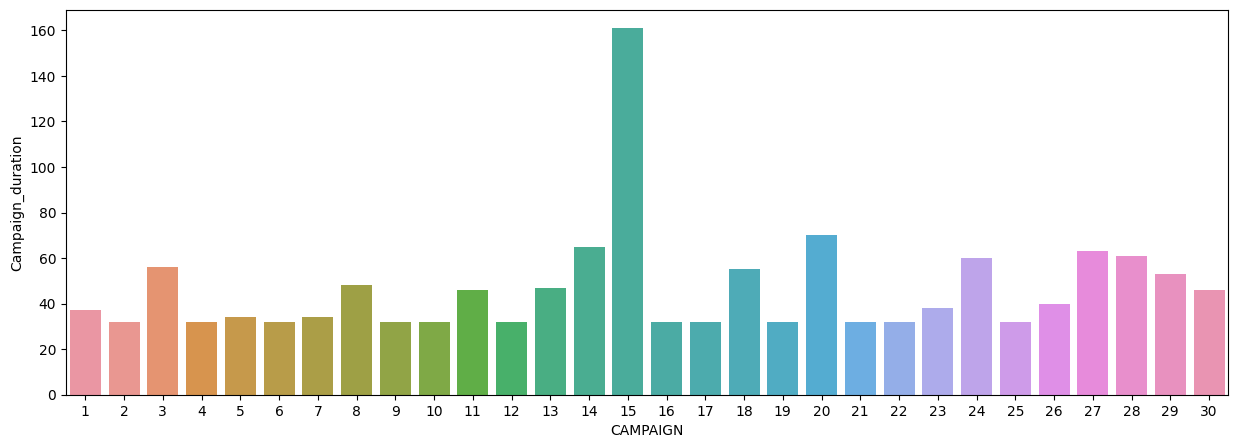

In [484]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Campaign_duration',data = CAMPAIGN_DESC_RAW)

In [485]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count', 'Campaign_duration':'mean'})

,CAMPAIGN,Campaign_duration
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


In [486]:
CAMPAIGN_DESC_RAW['Start_month'] = CAMPAIGN_DESC_RAW['Start_day'].dt.strftime('%m')

In [487]:
CAMPAIGN_DESC_RAW['End_month'] = CAMPAIGN_DESC_RAW['End_day'].dt.strftime('%m')

In [488]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11


In [489]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [490]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [491]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2500

In [ ]:
##There are 1584 households have participed to the campaign, leaving 916 households who never participated to any campaign.

In [492]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY')['CAMPAIGN'].count()

HOUSEHOLD_KEY
1       8
2       1
3       3
4       1
6       4
       ..
2496    5
2497    3
2498    6
2499    2
2500    8
Name: CAMPAIGN, Length: 1584, dtype: int64

Text(0, 0.5, 'Number of Households Reached To')

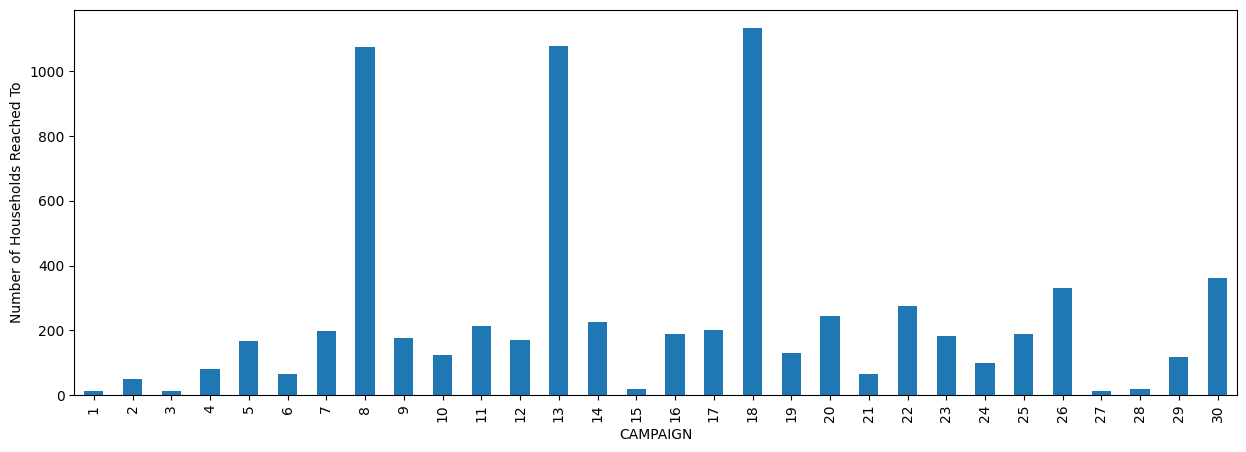

In [493]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of Households Reached To')

In [494]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

In [495]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [496]:
Coupon_given = 	COUPON_RAW.groupby('CAMPAIGN').aggregate(Total_product = ('PRODUCT_ID', 'nunique'),
                                                        Total_Coupon_Given = ('COUPON_UPC', 'nunique'))

In [497]:
Coupon_given.sort_values(by = 'Total_product', ascending = False).head()

,Total_product,Total_Coupon_Given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181


In [498]:
Coupon_given = Coupon_given.merge(right = CAMPAIGN_DESC_RAW, on = 'CAMPAIGN', how = 'left')

In [499]:
Coupon_given.head()

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02


In [500]:
Coupon_given.loc[:,('CAMPAIGN','Total_product','Total_Coupon_Given','DESCRIPTION','Campaign_duration','Start_day','End_day')].sort_values(by='Total_product',
                    ascending=False).head(10)
Coupon_given.head()

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02


In [501]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [502]:
PRODUCT_RAW.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [503]:
Coupon_product = COUPON_RAW.merge(right = PRODUCT_RAW, on = 'PRODUCT_ID', how = 'left')
Coupon_product.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [504]:
Coupon_product['COMMODITY_DESC'].value_counts().head()

COMMODITY_DESC
HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
Name: count, dtype: int64

In [505]:
COUPON_REDEMPT_RAW.columns

Index(['HOUSEHOLD_KEY', 'DAY', 'COUPON_UPC', 'CAMPAIGN', 'Date'], dtype='object')

In [506]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

<Axes: xlabel='CAMPAIGN'>

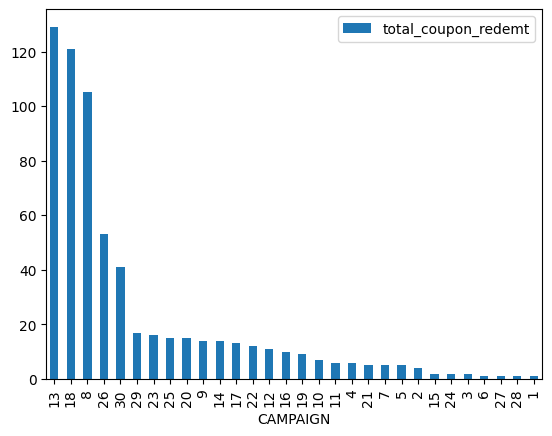

In [507]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redemt=('COUPON_UPC', 'nunique')).sort_values(by = 'total_coupon_redemt', ascending = False).plot.bar()

In [508]:
Coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redemt = ('COUPON_UPC', 'nunique'))

In [509]:
Coupon_redeem.sort_values(by = 'total_coupon_redemt', ascending  = False)

,total_coupon_redemt
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41
29,17
23,16
25,15
20,15


In [510]:
Coupon_given.head()

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02


In [511]:
Coupon_redeem.head()

,total_coupon_redemt
CAMPAIGN,
1,1
2,4
3,2
4,6
5,5


In [512]:
Coupon_redeem = Coupon_redeem.merge(right = Coupon_given, on = 'CAMPAIGN', how= 'left')

In [513]:
Coupon_redeem.head()

,CAMPAIGN,total_coupon_redemt,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02


In [514]:
Coupon_redeem['Coupon_redeem_rate']=(Coupon_redeem['total_coupon_redemt']/Coupon_redeem['Total_Coupon_Given'])*100

In [515]:
Coupon_redeem.sort_values(by = 'Coupon_redeem_rate', ascending = False).head()

,CAMPAIGN,total_coupon_redemt,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month,Coupon_redeem_rate
23,24,2,1887,2,TypeB,659,719,2021-10-21,2021-12-20,60,10,12,100.000000
5,6,1,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,100.000000
14,15,2,55,2,TypeC,547,708,2021-07-01,2021-12-09,161,07,12,100.000000
22,23,16,767,18,TypeB,646,684,2021-10-08,2021-11-15,38,10,11,88.888889
24,25,15,826,17,TypeB,659,691,2021-10-21,2021-11-22,32,10,11,88.235294


<Axes: xlabel='CAMPAIGN', ylabel='Coupon_redeem_rate'>

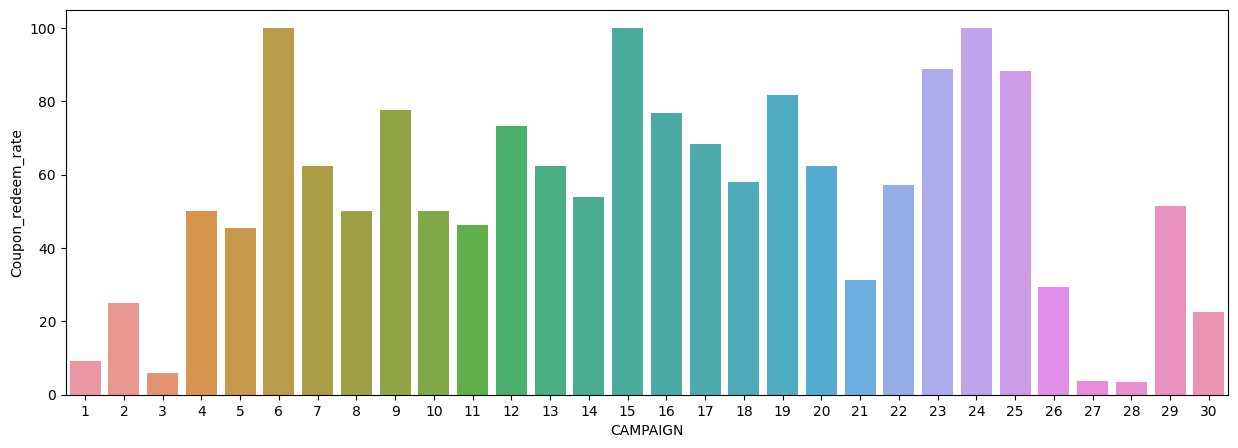

In [516]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Coupon_redeem_rate',data=Coupon_redeem)

In [517]:
TRANSACTION_RAW.shape

(2595732, 13)

In [518]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'DATE'],
      dtype='object')

In [519]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
DATE                 0
dtype: int64

In [ ]:
TRANSACTION_RAW['BASKET_ID'].count()

In [520]:
TRANSACTION_RAW['BASKET_ID'].nunique()

276484

In [521]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2500

In [522]:
txn_bucket = TRANSACTION_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [523]:
txn_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [524]:
txn_bucket['USE_COUPON'] = txn_bucket['COUPON_DISC']!=0

In [525]:
txn_bucket['USE_COUPON'].value_counts()

USE_COUPON
False    260812
True      15672
Name: count, dtype: int64

In [526]:
txn_bucket.sort_values('SALES_VALUE', ascending = False).head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,USE_COUPON
BASKET_ID,,,,
32006114302,961.49,0,0,False
40387571385,681.58,0,0,False
33347880492,552.92,-3,0,True
32505140858,545.17,0,0,False
30983766334,545.07,0,0,False


In [527]:
round(txn_bucket['SALES_VALUE'].mean(),2)

29.14

Text(0.5, 1.0, 'Basket value boxplot')

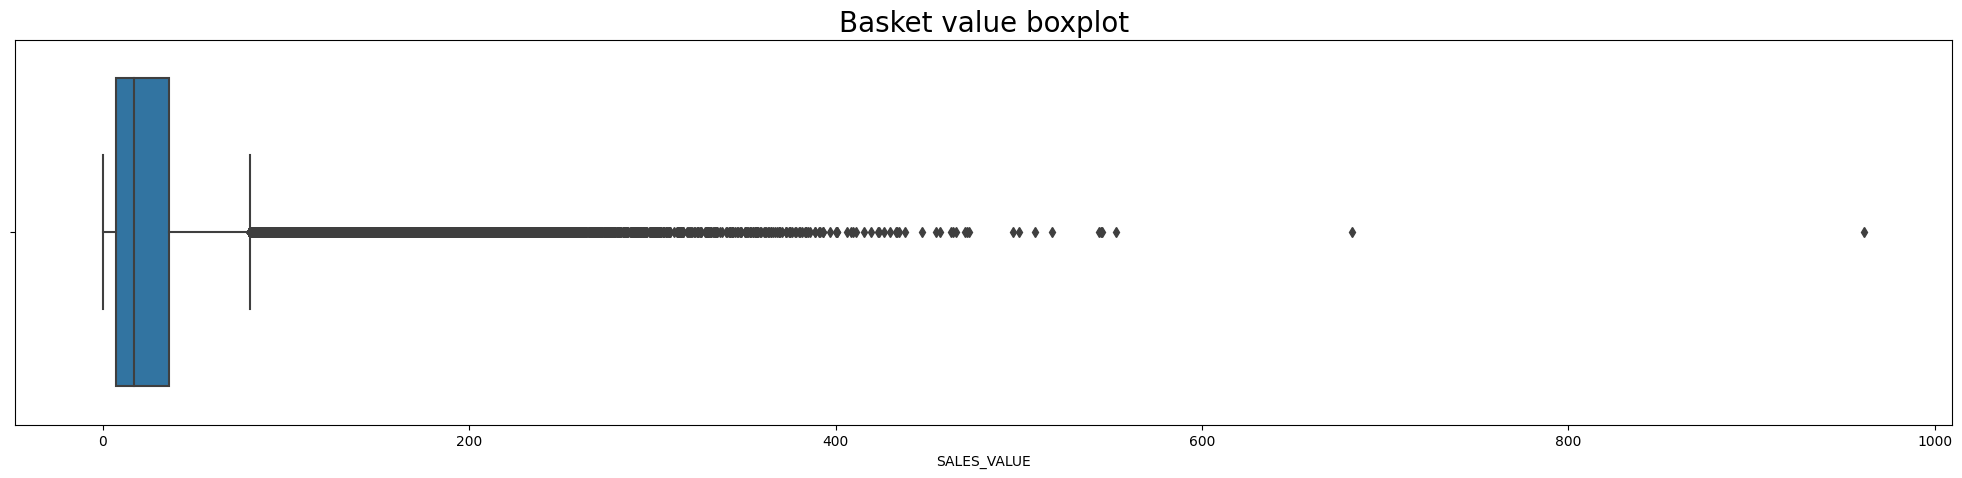

In [528]:
plt.figure(figsize=(25,5))
sns.boxplot(x=txn_bucket['SALES_VALUE'])
plt.title('Basket value boxplot', fontsize=20)

In [529]:
txn_bucket.groupby('USE_COUPON').aggregate(Sales_mean=('SALES_VALUE','mean'),
                                            COUPON_DISC_mean=('COUPON_DISC','mean'),
                                            COUPON_MATCH_DISC_mean =('COUPON_MATCH_DISC','mean'),
                                            No_coupon=('SALES_VALUE','count')
    
)

,Sales_mean,COUPON_DISC_mean,COUPON_MATCH_DISC_mean,No_coupon
USE_COUPON,,,,
False,26.795021,0.000000,-0.000019,260812
True,68.210833,-2.986536,-0.426748,15672


In [530]:
txn_desc=TRANSACTION_RAW.merge(right=txn_bucket,on='BASKET_ID',how='left')

In [531]:
txn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,DATE,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,USE_COUPON
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,0,0,2021-06-07,133.12,0,0,False
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,0,0,2021-06-07,133.12,0,0,False
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,0,0,2021-06-07,133.12,0,0,False
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,0,0,2021-06-07,133.12,0,0,False
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,0,0,2021-06-07,133.12,0,0,False


In [532]:
PRODUCT_RAW.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [533]:
txn_desc=txn_desc.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [534]:
txn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,USE_COUPON,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,...,133.12,0,0,False,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED SPECILATY ROLLS,12.4 OZ
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,...,133.12,0,0,False,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,...,133.12,0,0,False,69,MEAT-PCKGD,Private,MEAT - MISC,BREAST - BONELESS(IQF),3 LB
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,...,133.12,0,0,False,69,GROCERY,Private,BAKED BREAD/BUNS/ROLLS,HAMBURGER BUNS,21 OZ
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,...,133.12,0,0,False,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA


In [535]:
txn_desc.drop(['SALES_VALUE_x','SALES_VALUE_y','COUPON_DISC_y'],axis=1,inplace=True)

In [536]:
txn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,DATE,COUPON_MATCH_DISC_y,USE_COUPON,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,1370,35486432036,523,1085095,1,318,-0.49,1447,75,0,0,2021-06-07,0,False,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED SPECILATY ROLLS,12.4 OZ
1,1370,35486432036,523,1096343,2,318,-0.08,1447,75,0,0,2021-06-07,0,False,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,1370,35486432036,523,1099089,1,318,0.00,1447,75,0,0,2021-06-07,0,False,69,MEAT-PCKGD,Private,MEAT - MISC,BREAST - BONELESS(IQF),3 LB
3,1370,35486432036,523,1105616,1,318,-0.10,1447,75,0,0,2021-06-07,0,False,69,GROCERY,Private,BAKED BREAD/BUNS/ROLLS,HAMBURGER BUNS,21 OZ
4,1370,35486432036,523,1106523,1,318,0.00,1447,75,0,0,2021-06-07,0,False,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA


In [537]:
COMMODITY_coupon=txn_desc.groupby('COMMODITY_DESC').aggregate(total_quantity=('QUANTITY','count'),
                                                              use_coupon=('USE_COUPON','sum'),
                                                              Coupon=('COUPON_DISC_x','sum'))

In [538]:
COMMODITY_coupon.head()

,total_quantity,use_coupon,Coupon
COMMODITY_DESC,,,
,7839,6019,-10596
(CORP USE ONLY),61,5,0
ADULT INCONTINENCE,553,87,-37
AIR CARE,5556,1320,-929
ANALGESICS,4769,692,-13


In [539]:
COMMODITY_coupon['Coupon%']=round(COMMODITY_coupon['use_coupon']/COMMODITY_coupon['total_quantity']*100,2)

In [540]:
COMMODITY_coupon.sort_values(by='Coupon%',ascending=False).head()

,total_quantity,use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
,7839,6019,-10596,76.78
BABY FOODS,20356,5648,-349,27.75
RESTRICTED DIET,51,13,0,25.49
DIAPERS & DISPOSABLES,5008,1216,-1110,24.28
AIR CARE,5556,1320,-929,23.76


In [541]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,0,0,2021-06-07
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,0,0,2021-06-07
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,0,0,2021-06-07
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,0,0,2021-06-07
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,0,0,2021-06-07


In [542]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                  'COUPON_DISC' :'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          100     695        57.68       -14.85           -2   
                      698        50.54       -14.72           -2   
              101     704        73.65       -19.79           -2   
              102     706        13.95        -0.42            0   
                      708        45.12       -15.99           -1   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          100     695                  0  
                      698                  0  
              101     704                  0  
              102     706                  0  
                      708                  0  

[225533 rows x 4 columns]

In [543]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,0,0,2021-06-07
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,0,0,2021-06-07
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,0,0,2021-06-07
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,0,0,2021-06-07
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,0,0,2021-06-07


In [544]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['DATE'].dt.year).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum','COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
DATE,,,
2020,3645902.74,-641463.08,-18856
2021,4411560.34,-756871.76,-27949


In [545]:
##dropping the columns

In [546]:
from datetime import datetime

In [547]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_day,End_day,Campaign_duration,Start_month,End_month
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11


In [548]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [549]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,Start_day,End_day,Campaign_duration,Start_month,End_month
0,TypeB,24,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,2021-07-01,2021-12-09,161,07,12
2,TypeB,25,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,2021-09-07,2021-11-16,70,09,11
4,TypeB,23,2021-10-08,2021-11-15,38,10,11


In [550]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
Start_day            datetime64[ns]
End_day              datetime64[ns]
Campaign_duration             int16
Start_month                  object
End_month                    object
dtype: object

In [551]:
CAMPAIGN_DESC_RAW['Start_day']=pd.to_datetime(CAMPAIGN_DESC_RAW['Start_day']).apply(lambda x: x.date())

In [552]:
type(CAMPAIGN_DESC_RAW['Start_day'])

pandas.core.series.Series

In [553]:
CAMPAIGN_DESC_RAW['End_day']=pd.to_datetime(CAMPAIGN_DESC_RAW['End_day']).apply(lambda x: x.date())

In [554]:
type(CAMPAIGN_DESC_RAW['End_day'])

pandas.core.series.Series

In [555]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION          object
CAMPAIGN               int8
Start_day            object
End_day              object
Campaign_duration     int16
Start_month          object
End_month            object
dtype: object

In [556]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20


In [557]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis=1,inplace=True)

In [558]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2021-02-25
1,1,51700010076,8,2021-02-25
2,1,54200000033,8,2021-03-03
3,1,10000085476,18,2021-08-20
4,1,54200029176,18,2021-08-20


In [559]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY             int16
COUPON_UPC                int64
CAMPAIGN                   int8
Date             datetime64[ns]
dtype: object

In [560]:
COUPON_REDEMPT_RAW['Date']=pd.to_datetime(COUPON_REDEMPT_RAW['Date']).apply(lambda x: x.date())

In [561]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [562]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,1370,35486432036,523,1085095,1,1.47,318,-0.49,1447,75,0,0,2021-06-07
1,1370,35486432036,523,1096343,2,2.50,318,-0.08,1447,75,0,0,2021-06-07
2,1370,35486432036,523,1099089,1,8.99,318,0.00,1447,75,0,0,2021-06-07
3,1370,35486432036,523,1105616,1,1.39,318,-0.10,1447,75,0,0,2021-06-07
4,1370,35486432036,523,1106523,1,2.22,318,0.00,1447,75,0,0,2021-06-07


In [563]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [564]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,1370,35486432036,1085095,1,1.47,318,-0.49,1447,0,0,2021-06-07
1,1370,35486432036,1096343,2,2.50,318,-0.08,1447,0,0,2021-06-07
2,1370,35486432036,1099089,1,8.99,318,0.00,1447,0,0,2021-06-07
3,1370,35486432036,1105616,1,1.39,318,-0.10,1447,0,0,2021-06-07
4,1370,35486432036,1106523,1,2.22,318,0.00,1447,0,0,2021-06-07


In [565]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int32
RETAIL_DISC                 float64
TRANS_TIME                    int16
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
DATE                 datetime64[ns]
dtype: object

In [566]:
TRANSACTION_RAW['DATE']=pd.to_datetime(TRANSACTION_RAW['DATE']).apply(lambda x: x.date())

In [567]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int32
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
DATE                  object
dtype: object

In [568]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,1370,35486432036,1085095,1,1.47,318,-0.49,1447,0,0,2021-06-07
1,1370,35486432036,1096343,2,2.50,318,-0.08,1447,0,0,2021-06-07
2,1370,35486432036,1099089,1,8.99,318,0.00,1447,0,0,2021-06-07
3,1370,35486432036,1105616,1,1.39,318,-0.10,1447,0,0,2021-06-07
4,1370,35486432036,1106523,1,2.22,318,0.00,1447,0,0,2021-06-07


In [569]:
##loading tables into Datebase

In [570]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [571]:
conn = snowflake.connector.connect(
        user = 'ASHFAQ13',
        password = getpass.getpass('Your Snowflake Password: '),
        ##password='Your password',
        account = 'vr33157.ap-south-1.aws',
        database='RETAIL_ANALYSIS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH',
)

Your Snowflake Password:  ········


In [572]:
cur = conn.cursor()

In [573]:
COUPON_REDEMPT_RAW.head() ##cleaned COUPON_REDEMPT_RAW table

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2021-02-25
1,1,51700010076,8,2021-02-25
2,1,54200000033,8,2021-03-03
3,1,10000085476,18,2021-08-20
4,1,54200029176,18,2021-08-20


In [574]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [575]:
TRANSACTION_RAW.head() ##cleaned TRANSACTION_RAW table

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DATE
0,1370,35486432036,1085095,1,1.47,318,-0.49,1447,0,0,2021-06-07
1,1370,35486432036,1096343,2,2.50,318,-0.08,1447,0,0,2021-06-07
2,1370,35486432036,1099089,1,8.99,318,0.00,1447,0,0,2021-06-07
3,1370,35486432036,1105616,1,1.39,318,-0.10,1447,0,0,2021-06-07
4,1370,35486432036,1106523,1,2.22,318,0.00,1447,0,0,2021-06-07


In [576]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [577]:
CAMPAIGN_DESC_RAW.head() ##cleaned CAMPAIGN_DESC_RAW table

,DESCRIPTION,CAMPAIGN,Start_day,End_day,Campaign_duration,Start_month,End_month
0,TypeB,24,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,2021-07-01,2021-12-09,161,07,12
2,TypeB,25,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,2021-09-07,2021-11-16,70,09,11
4,TypeB,23,2021-10-08,2021-11-15,38,10,11


In [578]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_day date,
End_day  date,
Campaign_Duration NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10)
)''')

In [579]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [580]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [581]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2595732


In [582]:
conn.close()

In [583]:
cur.close()

False